<a href="https://colab.research.google.com/github/ozachun/python-kaggle-start-book/blob/master/sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from datetime import datetime, timedelta
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data= pd.read_csv('sample_data/is_valid.csv')
print(data)

       is_available DATE_ADD(entries.created_at,INTERVAL 9 HOUR)
0               NaN                             2017-01-06 16:34
1               NaN                             2017-01-06 16:37
2               NaN                             2017-01-06 16:41
3               NaN                             2017-01-06 19:05
4               NaN                             2017-01-24 10:51
...             ...                                          ...
69484           1.0                             2021-04-23 15:18
69485           1.0                             2021-04-23 15:30
69486           1.0                             2021-04-23 15:41
69487           1.0                             2021-04-23 15:47
69488           1.0                             2021-04-23 15:59

[69489 rows x 2 columns]


In [3]:
data = data.set_axis(['is_available', 'created_at'], axis=1)#列の名前を変更
data01 = data.dropna(axis = 'rows')#欠損値の削除
data01['created_at'] = pd.to_datetime(data01['created_at'])#型の変更
df = data01[(data01['created_at'] >= dt.datetime(2018,3,1)) & (data01['created_at'] < dt.datetime(2021,3,15))]
print(df) #2018/3/1(水)～2021/3/14(土)の期間の応募

       is_available          created_at
2900            1.0 2018-03-01 00:01:00
2901            1.0 2018-03-01 08:06:00
2902            1.0 2018-03-01 10:49:00
2903            1.0 2018-03-01 10:50:00
2904            1.0 2018-03-01 10:54:00
...             ...                 ...
63385           1.0 2021-03-14 22:54:00
63386           0.0 2021-03-14 22:57:00
63387           0.0 2021-03-14 23:09:00
63388           1.0 2021-03-14 23:36:00
63389           0.0 2021-03-14 23:48:00

[60255 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
df["created_at"] = pd.to_datetime(df["created_at"])#型の変更
df.set_index('created_at', inplace=True)#これでインデックスがDatetimeIndexとなる。
print(df)

                     is_available
created_at                       
2018-03-01 00:01:00           1.0
2018-03-01 08:06:00           1.0
2018-03-01 10:49:00           1.0
2018-03-01 10:50:00           1.0
2018-03-01 10:54:00           1.0
...                           ...
2021-03-14 22:54:00           1.0
2021-03-14 22:57:00           0.0
2021-03-14 23:09:00           0.0
2021-03-14 23:36:00           1.0
2021-03-14 23:48:00           0.0

[60255 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
df_daily = df.resample('1D').sum()#2018/3/1から2021/3/14までの１日ごとの応募数にまとめる
print(df_daily)

            is_available
created_at              
2018-03-01          21.0
2018-03-02          23.0
2018-03-03          18.0
2018-03-04           7.0
2018-03-05          22.0
...                  ...
2021-03-10         154.0
2021-03-11         158.0
2021-03-12         131.0
2021-03-13         111.0
2021-03-14          73.0

[1110 rows x 1 columns]


In [6]:
df_daily01 = df_daily.reset_index()#列の計算をするためにindexをリセット
print(df_daily01)

     created_at  is_available
0    2018-03-01          21.0
1    2018-03-02          23.0
2    2018-03-03          18.0
3    2018-03-04           7.0
4    2018-03-05          22.0
...         ...           ...
1105 2021-03-10         154.0
1106 2021-03-11         158.0
1107 2021-03-12         131.0
1108 2021-03-13         111.0
1109 2021-03-14          73.0

[1110 rows x 2 columns]


In [7]:
df5 = pd.concat([df_daily01["created_at"]] * 24, 1).stack().reset_index(drop=True)#応募日の列を24行分コピー
df10 = pd.concat([df_daily01["is_available"]] * 24, 1).stack().reset_index(drop=True)#応募数の列を24行分コピー
df50 = pd.concat([df5, df10], axis=1)#上記24倍した列を一つの表にまとめる
print(df50)

               0     1
0     2018-03-01  21.0
1     2018-03-01  21.0
2     2018-03-01  21.0
3     2018-03-01  21.0
4     2018-03-01  21.0
...          ...   ...
26635 2021-03-14  73.0
26636 2021-03-14  73.0
26637 2021-03-14  73.0
26638 2021-03-14  73.0
26639 2021-03-14  73.0

[26640 rows x 2 columns]


In [8]:
df_hour = df.resample('1H').sum()#2018/3/1から2021/3/14までの１時間ごとの応募数
df_hour = df_hour.reset_index()#列の計算をするためにindexをリセット
print(df_hour)

               created_at  is_available
0     2018-03-01 00:00:00           1.0
1     2018-03-01 01:00:00           0.0
2     2018-03-01 02:00:00           0.0
3     2018-03-01 03:00:00           0.0
4     2018-03-01 04:00:00           0.0
...                   ...           ...
26635 2021-03-14 19:00:00           6.0
26636 2021-03-14 20:00:00           4.0
26637 2021-03-14 21:00:00           1.0
26638 2021-03-14 22:00:00           5.0
26639 2021-03-14 23:00:00           1.0

[26640 rows x 2 columns]


In [9]:
df50 = df50.assign(ID=range(len(df50)))#ID列を追加
df_hour = df_hour.assign(ID=range(len(df_hour)))#ID列を追加
print(df50)
print(df_hour)

               0     1     ID
0     2018-03-01  21.0      0
1     2018-03-01  21.0      1
2     2018-03-01  21.0      2
3     2018-03-01  21.0      3
4     2018-03-01  21.0      4
...          ...   ...    ...
26635 2021-03-14  73.0  26635
26636 2021-03-14  73.0  26636
26637 2021-03-14  73.0  26637
26638 2021-03-14  73.0  26638
26639 2021-03-14  73.0  26639

[26640 rows x 3 columns]
               created_at  is_available     ID
0     2018-03-01 00:00:00           1.0      0
1     2018-03-01 01:00:00           0.0      1
2     2018-03-01 02:00:00           0.0      2
3     2018-03-01 03:00:00           0.0      3
4     2018-03-01 04:00:00           0.0      4
...                   ...           ...    ...
26635 2021-03-14 19:00:00           6.0  26635
26636 2021-03-14 20:00:00           4.0  26636
26637 2021-03-14 21:00:00           1.0  26637
26638 2021-03-14 22:00:00           5.0  26638
26639 2021-03-14 23:00:00           1.0  26639

[26640 rows x 3 columns]


In [10]:
df100 = pd.merge(df50, df_hour)#表の結合（5列）
print(df100)

               0     1     ID          created_at  is_available
0     2018-03-01  21.0      0 2018-03-01 00:00:00           1.0
1     2018-03-01  21.0      1 2018-03-01 01:00:00           0.0
2     2018-03-01  21.0      2 2018-03-01 02:00:00           0.0
3     2018-03-01  21.0      3 2018-03-01 03:00:00           0.0
4     2018-03-01  21.0      4 2018-03-01 04:00:00           0.0
...          ...   ...    ...                 ...           ...
26635 2021-03-14  73.0  26635 2021-03-14 19:00:00           6.0
26636 2021-03-14  73.0  26636 2021-03-14 20:00:00           4.0
26637 2021-03-14  73.0  26637 2021-03-14 21:00:00           1.0
26638 2021-03-14  73.0  26638 2021-03-14 22:00:00           5.0
26639 2021-03-14  73.0  26639 2021-03-14 23:00:00           1.0

[26640 rows x 5 columns]


In [11]:
#1時間ごとの応募割合の計算＋表への結合(6列)
percent = df100["is_available"]/df100[1]
df100 = pd.concat([df100, percent], axis=1)
print(df100)

               0     1     ID          created_at  is_available         0
0     2018-03-01  21.0      0 2018-03-01 00:00:00           1.0  0.047619
1     2018-03-01  21.0      1 2018-03-01 01:00:00           0.0  0.000000
2     2018-03-01  21.0      2 2018-03-01 02:00:00           0.0  0.000000
3     2018-03-01  21.0      3 2018-03-01 03:00:00           0.0  0.000000
4     2018-03-01  21.0      4 2018-03-01 04:00:00           0.0  0.000000
...          ...   ...    ...                 ...           ...       ...
26635 2021-03-14  73.0  26635 2021-03-14 19:00:00           6.0  0.082192
26636 2021-03-14  73.0  26636 2021-03-14 20:00:00           4.0  0.054795
26637 2021-03-14  73.0  26637 2021-03-14 21:00:00           1.0  0.013699
26638 2021-03-14  73.0  26638 2021-03-14 22:00:00           5.0  0.068493
26639 2021-03-14  73.0  26639 2021-03-14 23:00:00           1.0  0.013699

[26640 rows x 6 columns]


In [12]:
df100 = df100.set_axis(['a', 'b', 'ID', 'c', 'd', 'e'], axis=1)#列名を英語に変更
print(df100)

               a     b     ID                   c    d         e
0     2018-03-01  21.0      0 2018-03-01 00:00:00  1.0  0.047619
1     2018-03-01  21.0      1 2018-03-01 01:00:00  0.0  0.000000
2     2018-03-01  21.0      2 2018-03-01 02:00:00  0.0  0.000000
3     2018-03-01  21.0      3 2018-03-01 03:00:00  0.0  0.000000
4     2018-03-01  21.0      4 2018-03-01 04:00:00  0.0  0.000000
...          ...   ...    ...                 ...  ...       ...
26635 2021-03-14  73.0  26635 2021-03-14 19:00:00  6.0  0.082192
26636 2021-03-14  73.0  26636 2021-03-14 20:00:00  4.0  0.054795
26637 2021-03-14  73.0  26637 2021-03-14 21:00:00  1.0  0.013699
26638 2021-03-14  73.0  26638 2021-03-14 22:00:00  5.0  0.068493
26639 2021-03-14  73.0  26639 2021-03-14 23:00:00  1.0  0.013699

[26640 rows x 6 columns]


In [13]:
#累積応募割合を計算＋列に追加(7列)
df_f = df100["e"].cumsum(axis=0)
df_f = pd.concat([df_f, df_f], axis=1)
df_f = df_f.set_axis(['f', 'g'], axis=1)
df100 = pd.concat([df100, df_f["f"]], axis=1)
print(df100)

               a     b     ID                   c    d         e            f
0     2018-03-01  21.0      0 2018-03-01 00:00:00  1.0  0.047619     0.047619
1     2018-03-01  21.0      1 2018-03-01 01:00:00  0.0  0.000000     0.047619
2     2018-03-01  21.0      2 2018-03-01 02:00:00  0.0  0.000000     0.047619
3     2018-03-01  21.0      3 2018-03-01 03:00:00  0.0  0.000000     0.047619
4     2018-03-01  21.0      4 2018-03-01 04:00:00  0.0  0.000000     0.047619
...          ...   ...    ...                 ...  ...       ...          ...
26635 2021-03-14  73.0  26635 2021-03-14 19:00:00  6.0  0.082192  1109.849315
26636 2021-03-14  73.0  26636 2021-03-14 20:00:00  4.0  0.054795  1109.904110
26637 2021-03-14  73.0  26637 2021-03-14 21:00:00  1.0  0.013699  1109.917808
26638 2021-03-14  73.0  26638 2021-03-14 22:00:00  5.0  0.068493  1109.986301
26639 2021-03-14  73.0  26639 2021-03-14 23:00:00  1.0  0.013699  1110.000000

[26640 rows x 7 columns]


In [14]:
print(df100) #1時は24n(n=0,1,...,1109),２時は24n+1(n=0,1,...,1109),・・・

               a     b     ID                   c    d         e            f
0     2018-03-01  21.0      0 2018-03-01 00:00:00  1.0  0.047619     0.047619
1     2018-03-01  21.0      1 2018-03-01 01:00:00  0.0  0.000000     0.047619
2     2018-03-01  21.0      2 2018-03-01 02:00:00  0.0  0.000000     0.047619
3     2018-03-01  21.0      3 2018-03-01 03:00:00  0.0  0.000000     0.047619
4     2018-03-01  21.0      4 2018-03-01 04:00:00  0.0  0.000000     0.047619
...          ...   ...    ...                 ...  ...       ...          ...
26635 2021-03-14  73.0  26635 2021-03-14 19:00:00  6.0  0.082192  1109.849315
26636 2021-03-14  73.0  26636 2021-03-14 20:00:00  4.0  0.054795  1109.904110
26637 2021-03-14  73.0  26637 2021-03-14 21:00:00  1.0  0.013699  1109.917808
26638 2021-03-14  73.0  26638 2021-03-14 22:00:00  5.0  0.068493  1109.986301
26639 2021-03-14  73.0  26639 2021-03-14 23:00:00  1.0  0.013699  1110.000000

[26640 rows x 7 columns]


In [15]:
#1日の応募割合を計算する①累積和-経過日数をしたい
results = []
for i in range(len(df100)):
  x = i//24 #商を計算
  results.append(x)
print(results)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,

In [16]:
#上記で計算した列をdf100に追加（7列目）
results = pd.DataFrame(results)
df100 = pd.concat([df100, results], axis=1)
df100 = df100.set_axis(['a', 'b', 'ID', 'c', 'd', 'e', 'f', 'g'], axis=1)#列名の名前の変更
print(df100)

               a     b     ID  ...         e            f     g
0     2018-03-01  21.0      0  ...  0.047619     0.047619     0
1     2018-03-01  21.0      1  ...  0.000000     0.047619     0
2     2018-03-01  21.0      2  ...  0.000000     0.047619     0
3     2018-03-01  21.0      3  ...  0.000000     0.047619     0
4     2018-03-01  21.0      4  ...  0.000000     0.047619     0
...          ...   ...    ...  ...       ...          ...   ...
26635 2021-03-14  73.0  26635  ...  0.082192  1109.849315  1109
26636 2021-03-14  73.0  26636  ...  0.054795  1109.904110  1109
26637 2021-03-14  73.0  26637  ...  0.013699  1109.917808  1109
26638 2021-03-14  73.0  26638  ...  0.068493  1109.986301  1109
26639 2021-03-14  73.0  26639  ...  0.013699  1110.000000  1109

[26640 rows x 8 columns]


In [17]:
#引き算の結果を列に追加(8列目)
df100["h"] = df100["f"] - df100["g"]
print(df100)

               a     b     ID  ...            f     g         h
0     2018-03-01  21.0      0  ...     0.047619     0  0.047619
1     2018-03-01  21.0      1  ...     0.047619     0  0.047619
2     2018-03-01  21.0      2  ...     0.047619     0  0.047619
3     2018-03-01  21.0      3  ...     0.047619     0  0.047619
4     2018-03-01  21.0      4  ...     0.047619     0  0.047619
...          ...   ...    ...  ...          ...   ...       ...
26635 2021-03-14  73.0  26635  ...  1109.849315  1109  0.849315
26636 2021-03-14  73.0  26636  ...  1109.904110  1109  0.904110
26637 2021-03-14  73.0  26637  ...  1109.917808  1109  0.917808
26638 2021-03-14  73.0  26638  ...  1109.986301  1109  0.986301
26639 2021-03-14  73.0  26639  ...  1110.000000  1109  1.000000

[26640 rows x 9 columns]


In [18]:
#日付から曜日を判定し、表に追加 0:月曜日,...,6:日曜日
import datetime as dt

dates = []
for i in range(0,len(df100)):
  datey = df100.iloc[i,0]
  datey_y = datey.year
  datey_m = datey.month
  datey_d = datey.day
  datey = dt.date(datey_y, datey_m, datey_d).weekday()
  dates.append(datey)

In [19]:
print(dates[2])
print(len(dates))
print(dates)

3
26640
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [20]:
#曜日の値をdfに追加(10列)
df100 = df100.assign(date=dates)

In [21]:
print(df100.head(50))

            a     b  ID                   c  ...         f  g         h  date
0  2018-03-01  21.0   0 2018-03-01 00:00:00  ...  0.047619  0  0.047619     3
1  2018-03-01  21.0   1 2018-03-01 01:00:00  ...  0.047619  0  0.047619     3
2  2018-03-01  21.0   2 2018-03-01 02:00:00  ...  0.047619  0  0.047619     3
3  2018-03-01  21.0   3 2018-03-01 03:00:00  ...  0.047619  0  0.047619     3
4  2018-03-01  21.0   4 2018-03-01 04:00:00  ...  0.047619  0  0.047619     3
5  2018-03-01  21.0   5 2018-03-01 05:00:00  ...  0.047619  0  0.047619     3
6  2018-03-01  21.0   6 2018-03-01 06:00:00  ...  0.047619  0  0.047619     3
7  2018-03-01  21.0   7 2018-03-01 07:00:00  ...  0.047619  0  0.047619     3
8  2018-03-01  21.0   8 2018-03-01 08:00:00  ...  0.095238  0  0.095238     3
9  2018-03-01  21.0   9 2018-03-01 09:00:00  ...  0.095238  0  0.095238     3
10 2018-03-01  21.0  10 2018-03-01 10:00:00  ...  0.238095  0  0.238095     3
11 2018-03-01  21.0  11 2018-03-01 11:00:00  ...  0.333333  0  0

In [22]:
#１時間ごとに行を抽出
tables = []
for i in range(0,24):
  table = []
  table = df100[i::24]
  tables.append(table)

In [23]:
tables_hour = tables[0]
print(tables_hour)
print(tables_hour["date"])
print(tables_hour[tables_hour['date'].isin([1])])

               a      b     ID  ...     g             h  date
0     2018-03-01   21.0      0  ...     0  4.761905e-02     3
24    2018-03-02   23.0     24  ...     1  0.000000e+00     4
48    2018-03-03   18.0     48  ...     2  5.555556e-02     5
72    2018-03-04    7.0     72  ...     3 -2.220446e-15     6
96    2018-03-05   22.0     96  ...     4 -2.664535e-15     0
...          ...    ...    ...  ...   ...           ...   ...
26520 2021-03-10  154.0  26520  ...  1105  1.298701e-02     2
26544 2021-03-11  158.0  26544  ...  1106  1.265823e-02     3
26568 2021-03-12  131.0  26568  ...  1107  5.343511e-02     4
26592 2021-03-13  111.0  26592  ...  1108  2.702703e-02     5
26616 2021-03-14   73.0  26616  ...  1109  1.369863e-02     6

[1110 rows x 10 columns]
0        3
24       4
48       5
72       6
96       0
        ..
26520    2
26544    3
26568    4
26592    5
26616    6
Name: date, Length: 1110, dtype: int64
               a      b     ID  ...     g             h  date
120   20

In [24]:
#曜日ごとに抽出
tables_hourdate = []
tables_hourdates =[]
for i in range(0,24):
  tables_hour = []
  tables_hour = tables[i] #0時時点の抽出
  print(tables_hour)
  for j in range(0,7):
    print(tables_hour[tables_hour['date'].isin([j])]) #0時かつ月曜日を抽出
    tables_hourdate = np.array(tables_hour[tables_hour['date'].isin([j])])
    print(tables_hourdate)
    tables_hourdates = np.append(tables_hourdate, tables_hourdate)

               a      b     ID  ...     g             h  date
0     2018-03-01   21.0      0  ...     0  4.761905e-02     3
24    2018-03-02   23.0     24  ...     1  0.000000e+00     4
48    2018-03-03   18.0     48  ...     2  5.555556e-02     5
72    2018-03-04    7.0     72  ...     3 -2.220446e-15     6
96    2018-03-05   22.0     96  ...     4 -2.664535e-15     0
...          ...    ...    ...  ...   ...           ...   ...
26520 2021-03-10  154.0  26520  ...  1105  1.298701e-02     2
26544 2021-03-11  158.0  26544  ...  1106  1.265823e-02     3
26568 2021-03-12  131.0  26568  ...  1107  5.343511e-02     4
26592 2021-03-13  111.0  26592  ...  1108  2.702703e-02     5
26616 2021-03-14   73.0  26616  ...  1109  1.369863e-02     6

[1110 rows x 10 columns]
               a      b     ID  ...     g             h  date
96    2018-03-05   22.0     96  ...     4 -2.664535e-15     0
264   2018-03-12   23.0    264  ...    11 -1.243450e-14     0
432   2018-03-19   27.0    432  ...    18 -1

In [25]:
print(tables_hourdates.shape)

(3180,)


In [26]:
print(tables[0])#0～1時時点の抽出結果
print(tables[23])#23～24時時点の抽出結果

               a      b     ID  ...     g             h  date
0     2018-03-01   21.0      0  ...     0  4.761905e-02     3
24    2018-03-02   23.0     24  ...     1  0.000000e+00     4
48    2018-03-03   18.0     48  ...     2  5.555556e-02     5
72    2018-03-04    7.0     72  ...     3 -2.220446e-15     6
96    2018-03-05   22.0     96  ...     4 -2.664535e-15     0
...          ...    ...    ...  ...   ...           ...   ...
26520 2021-03-10  154.0  26520  ...  1105  1.298701e-02     2
26544 2021-03-11  158.0  26544  ...  1106  1.265823e-02     3
26568 2021-03-12  131.0  26568  ...  1107  5.343511e-02     4
26592 2021-03-13  111.0  26592  ...  1108  2.702703e-02     5
26616 2021-03-14   73.0  26616  ...  1109  1.369863e-02     6

[1110 rows x 10 columns]
               a      b     ID                   c  ...       f     g    h  date
23    2018-03-01   21.0     23 2018-03-01 23:00:00  ...     1.0     0  1.0     3
47    2018-03-02   23.0     47 2018-03-02 23:00:00  ...     2.0     

In [27]:
#2018/3/1の300日以降のデータを抽出
ts = []
for i in range(0,24):
  t = tables[i][300:]
  ts.append(t)

In [28]:
print(ts[0])#0～1時時点かつ2018/3/1の300日以降の抽出結果
print(ts[23])#23～24時時点かつ2018/3/1の300日以降の抽出結果

               a      b     ID  ...     g             h  date
7200  2018-12-26   23.0   7200  ...   300 -1.364242e-12     2
7224  2018-12-27   25.0   7224  ...   301 -1.421085e-12     3
7248  2018-12-28   15.0   7248  ...   302  6.666667e-02     4
7272  2018-12-29    9.0   7272  ...   303 -1.421085e-12     5
7296  2018-12-30    8.0   7296  ...   304 -1.534772e-12     6
...          ...    ...    ...  ...   ...           ...   ...
26520 2021-03-10  154.0  26520  ...  1105  1.298701e-02     2
26544 2021-03-11  158.0  26544  ...  1106  1.265823e-02     3
26568 2021-03-12  131.0  26568  ...  1107  5.343511e-02     4
26592 2021-03-13  111.0  26592  ...  1108  2.702703e-02     5
26616 2021-03-14   73.0  26616  ...  1109  1.369863e-02     6

[810 rows x 10 columns]
               a      b     ID                   c  ...       f     g    h  date
7223  2018-12-26   23.0   7223 2018-12-26 23:00:00  ...   301.0   300  1.0     2
7247  2018-12-27   25.0   7247 2018-12-27 23:00:00  ...   302.0   301

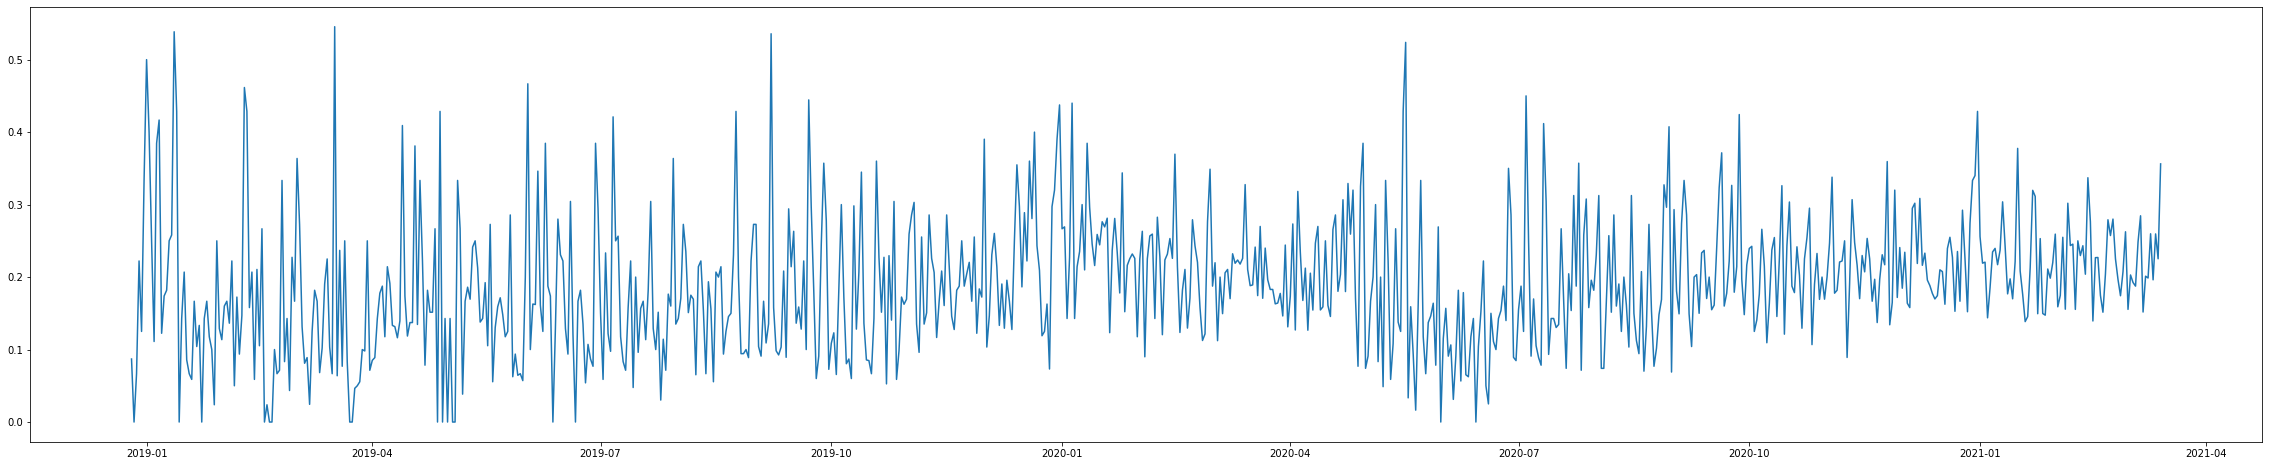

In [29]:
x = ts[9]['a']
y = ts[9]['h']
plt.rcParams["figure.figsize"] = (40, 8)
plt.plot(x, y)

In [30]:
#2021/3/14までの165日のデータの平均を抽出
ts_mean = []
for i in range(0,24):
  t_mean = ts[i].tail(165).mean()
  ts_mean.append(t_mean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  after removing the cwd from sys.path.


In [31]:
print(ts_mean[0])#0～1時時点の平均を抽出
print(ts_mean[23])#23～24時時点の平均を抽出

b         107.830303
ID      24648.000000
d           2.727273
e           0.025695
f        1027.025695
g        1027.000000
h           0.025695
date        3.036364
dtype: float64
b         107.830303
ID      24671.000000
d           3.915152
e           0.037112
f        1028.000000
g        1027.000000
h           1.000000
date        3.036364
dtype: float64


In [32]:
a_s =[]
for i in range(0,24):
  a = ts_mean[i][6:7]
  a_s.append(a)

In [33]:
print(a_s[0])#１時時点での平均応募割合
print(a_s[9])#10時時点での平均応募割合

h    0.025695
dtype: float64
h    0.218501
dtype: float64
